In [3]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=a7e0128ac7a4a0483d630b6f4aac2b617f7d2ba4074e744261a4e8fcad69e200
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


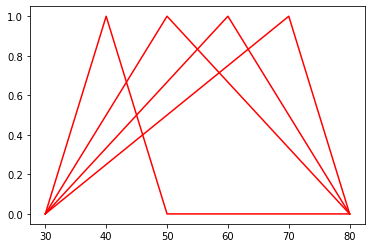

In [ ]:
from numpy.lib.function_base import median
from IPython.core import prefilter
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x=np.arange(30,80.1,1)
slow=fuzz.trimf(x,[30,40,50])
median=fuzz.trimf(x,[30,50,80])
full_speed=fuzz.trimf(x,[30,60,80])
median_fast=fuzz.trimf(x,[30,70,80])
plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label='slow')
plt.plot(x,median,'r',linewidth=1.5,label='slow')
plt.plot(x,full_speed,'r',linewidth=1.5,label='slow')
plt.plot(x,median_fast,'r',linewidth=1.5,label='slow')


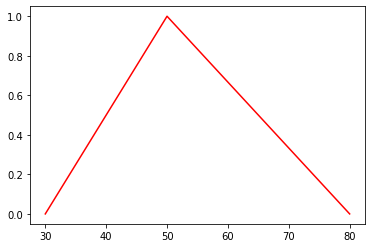

In [ ]:
from numpy.lib.function_base import median
from IPython.core import prefilter
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x=np.arange(30,80.1,1)
slow=fuzz.trimf(x,[30,40,50])
median=fuzz.trimf(x,[30,50,80])
full_speed=fuzz.trimf(x,[30,60,80])
median_fast=fuzz.trimf(x,[30,70,80]) # .trimf 3 so
taopmf=fuzz.trapmf(x,[30,50,50,80]) # .trapmf 4 so
plt.figure()
plt.plot(x,taopmf,'r',linewidth=1.5,label='slow')


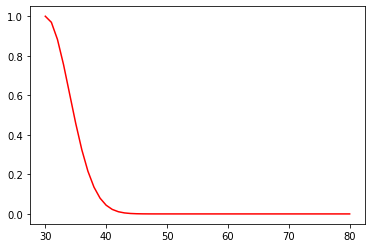

In [ ]:
from numpy.lib.function_base import median
from IPython.core import prefilter
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x=np.arange(30,80.1,1)
solw= fuzz.gaussmf(x,30,4)
median= fuzz.gaussmf(x,50,4)
solw= fuzz.gaussmf(x,30,4)
solw= fuzz.gaussmf(x,30,4)
plt.figure()
plt.plot(x,solw,'r',linewidth=1.5,label='slow')


ValueError: ignored

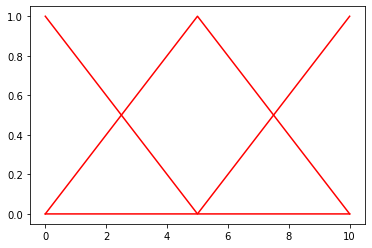

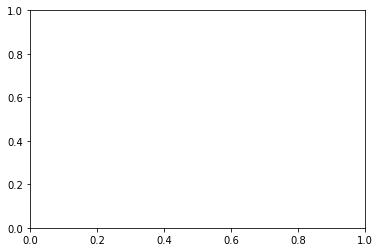

In [ ]:
from numpy.lib.function_base import median
from IPython.core import prefilter
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x=np.arange(0,10.1,1)
# dv
poor=fuzz.trimf(x,[0,0,5])
average=fuzz.trimf(x,[0,5,10])
good=fuzz.trimf(x,[5,10,10])
plt.figure()
plt.plot(x,poor,'r',linewidth=1.5,label='slow')
plt.plot(x,average,'r',linewidth=1.5,label='slow')
plt.plot(x,good,'r',linewidth=1.5,label='slow')

# tip


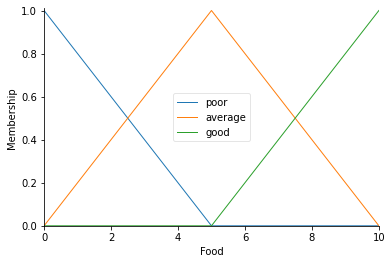

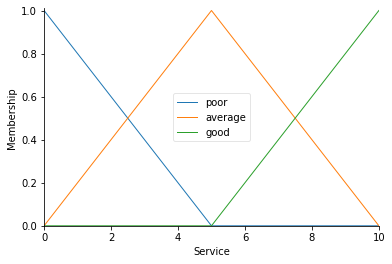

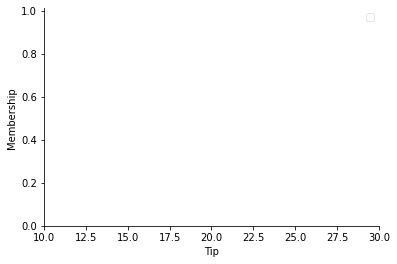

In [ ]:

import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

# dv
food=ctrl.Antecedent(np.arange(0,11,1),'Food')
service=ctrl.Antecedent(np.arange(0,11,1),'Service')
tip=ctrl.Consequent(np.arange(10,31,1),'Tip')

food['poor']=fuzz.trimf(food.universe,[0,0,5])
food['average']=fuzz.trimf(food.universe,[0,5,10])
food['good']=fuzz.trimf(food.universe,[5,10,10])

service['poor']=fuzz.trimf(service.universe,[0,0,5])
service['average']=fuzz.trimf(service.universe,[0,5,10])
service['good']=fuzz.trimf(service.universe,[5,10,10])

#tip['poor']=fuzz.trimf(service.universe,[0,0,5])

food.view()
service.view()
tip.view()

25.5125


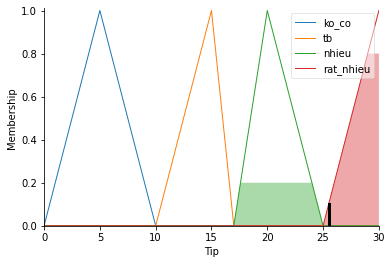

In [31]:
from numpy.lib.function_base import median
from IPython.core import prefilter
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

# dv
food=ctrl.Antecedent(np.arange(0,11,1),'Food')
service=ctrl.Antecedent(np.arange(0,11,1),'Service')
tip=ctrl.Consequent(np.arange(0,31,1),'Tip')

food['poor']=fuzz.trimf(food.universe,[0,0,5])
food['average']=fuzz.trimf(food.universe,[0,5,10])
food['good']=fuzz.trimf(food.universe,[5,10,10])

service['poor']=fuzz.trimf(service.universe,[0,0,5])
service['average']=fuzz.trimf(service.universe,[0,5,10])
service['good']=fuzz.trimf(service.universe,[5,10,10])

tip['ko_co']=fuzz.trimf(tip.universe,[0,5,10])
tip['tb']=fuzz.trimf(tip.universe,[10,15,17])
tip['nhieu']=fuzz.trimf(tip.universe,[17,20,25])
tip['rat_nhieu']=fuzz.trimf(tip.universe,[25,30,30])

rale1=ctrl.Rule(food['poor'] & service['poor'],tip['ko_co'])
rale2=ctrl.Rule(food['poor'] & service['average'],tip['ko_co'])
rale3=ctrl.Rule(food['poor'] & service['good'],tip['ko_co'])
rale4=ctrl.Rule(food['average'] & service['poor'],tip['ko_co'])
rale5=ctrl.Rule(food['average'] & service['average'],tip['tb'])
rale6=ctrl.Rule(food['average'] & service['good'],tip['nhieu'])
rale7=ctrl.Rule(food['good'] & service['poor'],tip['ko_co'])
rale8=ctrl.Rule(food['good'] & service['average'],tip['nhieu'])
rale9=ctrl.Rule(food['good'] & service['good'],tip['rat_nhieu'])
#%
tipping_ctrl= ctrl.ControlSystem([rale1,rale2,rale3,rale4,rale5,rale6,rale7,rale8,rale9])
tipping= ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['Food']=9
tipping.input['Service']= 10
tipping.compute()
print(tipping.output['Tip'])

tip.view(sim=tipping)

In [ ]:
from matplotlib.font_manager import Timer
# code thoi gian nau gao
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

rice=ctrl.Antecedent(np.arange(0.2,2,0.2),'Rice')
time=ctrl.Antecedent(np.arange(10,180,10),'Time')
power=ctrl.Consequent(np.arange(0,100,1),'Power')

time['vs']=fuzz.trimf(time.universe,[0,10,20])
time['s']=fuzz.trimf(time.universe,[20,30,40])
time['av']=fuzz.trimf(time.universe,[40,60,90])
time['f']=fuzz.trimf(time.universe,[90,120,150])
time['vf']=fuzz.trimf(time.universe,[150,180,180])

rice['vm']=fuzz.trimf(rice.universe,[0,0.2,0.3])
rice['m']=fuzz.trimf(rice.universe,[0.3,0.5,0.8])
rice['av']=fuzz.trimf(rice.universe,[0.8,1,1.2])
rice['l']=fuzz.trimf(rice.universe,[1.2,1.5,1.7])
rice['f']=fuzz.trimf(rice.universe,[1.7,2,2])

power['1']=fuzz.trimf(power.universe,[0,45,50])
power['2']=fuzz.trimf(power.universe,[50,60,65])
power['3']=fuzz.trimf(power.universe,[65,75,78])
power['4']=fuzz.trimf(power.universe,[78,85,88])
power['5']=fuzz.trimf(power.universe,[88,95,100])

rale1=ctrl.Rule(time['vs'] & rice['vm'],power['2'])
rale2=ctrl.Rule(time['vs'] & rice['m'],power['3'])
rale3=ctrl.Rule(time['vs'] & rice['av'],power['4'])
rale4=ctrl.Rule(time['vs'] & rice['l'],power['5'])
rale5=ctrl.Rule(time['vs'] & rice['f'],power['5'])
rale6=ctrl.Rule(time['s'] & rice['vm'],power['2'])
rale7=ctrl.Rule(time['s'] & rice['m'],power['3'])
rale8=ctrl.Rule(time['s'] & rice['av'],power['3'])
rale9=ctrl.Rule(time['s'] & rice['l'],power['5'])
rale10=ctrl.Rule(time['s'] & rice['f'],power['5'])
rale11=ctrl.Rule(time['av'] & rice['vm'],power['1'])
rale12=ctrl.Rule(time['av'] & rice['m'],power['2'])
rale13=ctrl.Rule(time['av'] & rice['av'],power['3'])
rale14=ctrl.Rule(time['av'] & rice['l'],power['4'])
rale15=ctrl.Rule(time['av'] & rice['f'],power['4'])
rale16=ctrl.Rule(time['f'] & rice['vm'],power['1'])
rale17=ctrl.Rule(time['f'] & rice['m'],power['2'])
rale18=ctrl.Rule(time['f'] & rice['av'],power['2'])
rale19=ctrl.Rule(time['f'] & rice['l'],power['4'])
rale20=ctrl.Rule(time['f'] & rice['f'],power['4'])
rale21=ctrl.Rule(time['vf'] & rice['vm'],power['1'])
rale22=ctrl.Rule(time['vf'] & rice['m'],power['2'])
rale23=ctrl.Rule(time['vf'] & rice['av'],power['2'])
rale24=ctrl.Rule(time['vf'] & rice['l'],power['3'])
rale25=ctrl.Rule(time['vf'] & rice['f'],power['3'])

powering_ctrl= ctrl.ControlSystem([rale1,rale2,rale3,rale4,rale5,rale6,rale7,rale8,rale9,rale10,rale11,rale12,rale13,rale14,rale15,rale16,rale17,rale18,rale19,rale20,rale21,rale22,rale23,rale24,rale25])
powering= ctrl.ControlSystemSimulation(powering_ctrl)
powering.input['Rice']=0.5
powering.input['Time']= 30
powering.compute()
print(powering.output['Power'])

power.view(sim=powering)
